In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #For Detecting the Outliers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [18]:
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


--2019-12-03 18:59:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  1.89MB/s    in 2.0s    

2019-12-03 19:00:02 (1.89 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [38]:
df=pd.read_csv("./adult.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [42]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [43]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [196]:
x = df.iloc[:,[0,1,2,4,6,8,9,10,11,12,13]]
x

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Adm-clerical,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Exec-managerial,White,Male,0,0,13,United-States
...,...,...,...,...,...,...,...,...,...,...,...
32559,22,Private,201490,9,Adm-clerical,White,Male,0,0,20,United-States
32560,52,Self-emp-inc,287927,9,Exec-managerial,White,Female,15024,0,40,United-States


In [197]:
y = df.iloc[:,14]
y

0         <=50K
1         <=50K
          ...  
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

Determining the Columns having Null Values

In [134]:
print(x['age'].isnull().value_counts())
print(x['workclass'].isnull().value_counts())
print(x['fnlwgt'].isnull().value_counts())
print(x['education-num'].isnull().value_counts())
# print(x['marital_status'].isnull().value_counts())
print(x['occupation'].isnull().value_counts())
print(x['race'].isnull().value_counts())
print(x['sex'].isnull().value_counts())
print(x['capital-gain'].isnull().value_counts())
print(x['capital-loss'].isnull().value_counts())
print(x['hours-per-week'].isnull().value_counts())
print(x['native-country'].isnull().value_counts())

False    32561
Name: age, dtype: int64
False    32561
Name: workclass, dtype: int64
False    32561
Name: fnlwgt, dtype: int64
False    32561
Name: education-num, dtype: int64
False    32561
Name: occupation, dtype: int64
False    32561
Name: race, dtype: int64
False    32561
Name: sex, dtype: int64
False    32561
Name: capital-gain, dtype: int64
False    32561
Name: capital-loss, dtype: int64
False    32561
Name: hours-per-week, dtype: int64
False    32561
Name: native-country, dtype: int64


In [135]:
print(y.isnull().value_counts())

False    32561
Name: salary, dtype: int64


*NO VALUE IS MISSING*

*CONVERTING CONTINOUS DATA INTO NUMERICAL DATA*

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
le = LabelEncoder()

In [198]:
x['workclass'] = le.fit_transform(x['workclass'])
# x['marital_status'] = le.fit_transform(x['marital_status'])
x['occupation'] = le.fit_transform(x['occupation'])
x['race'] = le.fit_transform(x['race'])
x['sex'] = le.fit_transform(x['sex'])
x['native-country'] = le.fit_transform(x['native-country'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [199]:
y = le.fit_transform(y)

In [200]:
y = y.reshape(-1,1)
y.shape

(32561, 1)

# APPLYING ONE HOT ENCODING TO THE X TRANSFORMATIONS

In [201]:
from sklearn.preprocessing import OneHotEncoder

In [202]:
ohc = OneHotEncoder(categorical_features= [0])

In [203]:
x = ohc.fit_transform(x).toarray()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [204]:
x

array([[ 0.,  0.,  0., ...,  0., 40., 39.],
       [ 0.,  0.,  0., ...,  0., 13., 39.],
       [ 0.,  0.,  0., ...,  0., 40., 39.],
       ...,
       [ 0.,  0.,  0., ...,  0., 40., 39.],
       [ 0.,  0.,  0., ...,  0., 20., 39.],
       [ 0.,  0.,  0., ...,  0., 40., 39.]])

In [205]:
x.shape

(32561, 83)

# SPLITTING OF DATA

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

# LOGISTIC REGRESSION

In [207]:
from sklearn.linear_model import LogisticRegression

In [213]:
lr = LogisticRegression(max_iter=2000,tol=0.001)

In [214]:
lr.fit(x_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False)

In [215]:
y_predict = lr.predict(x_test)

In [216]:
cm_lr = confusion_matrix(y_test,y_predict)

In [233]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,y_predict)
a

0.7930610991710163

*ACCURACY OF THE MODEL IS 79%*

#### INCREASING ACCURACY OF LOGISTIC REGRESSION MODEL BY HYPERPARAMETER TUNING 

In [218]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [219]:
lr_hyper = LogisticRegression()

In [220]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [229]:
lf = RandomizedSearchCV(lr_hyper, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [230]:
best_model = lf.fit(x_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [231]:
y_predictt = best_model.predict(x_test)

In [234]:
cm_lr_hyper = confusion_matrix(y_test,y_predictt)
# cm_lr_hyper
print(accuracy_score(y_test,y_predictt))

0.8203868590727663


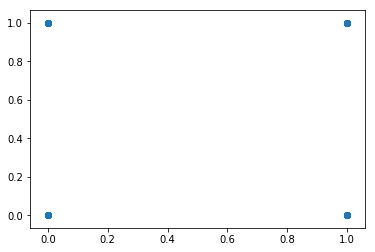

In [276]:
plt.scatter(y_test,y_predictt)
plt.show()

*ACCURACY HAS BEEN INCREASED TO 82.14%*

# SUPPORT VECTOR MACHINE

In [117]:
from sklearn.svm import SVC

### Training using Different Kernels and Parameters to obtain Highest accuracy Model....through SVC

In [246]:
# kernel = rbf
svc=  SVC(kernel='rbf',gamma='scale')
svc_kernel1 = svc.fit(x_train,y_train)
y_predict_svc_kernel1 = svc_kernel1.predict(x_test)
print(accuracy_score(y_test,y_predict_svc_kernel1))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483


In [247]:
# Kernel : Poly
polys = [1,2,3,4,5,6]
for poly in polys:
    svc_2  = SVC(kernel="poly",degree=poly)
    svc_kernel2 = svc.fit(x_train,y_train)
    y_predict_svc_kernel2 = svc_kernel2.predict(x_test)
    a = accuracy_score(y_test,y_predict_svc_kernel2)
    print(str(a)+ ' Degree '+str(poly))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 1


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 3


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 4


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 5


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933681301811483 Degree 6


### Maximum Accuracy we get from SVM is 79.33 %..

# Naive-Bayes Theorem

In [248]:
from sklearn.naive_bayes import GaussianNB

In [249]:
nb = GaussianNB()

In [250]:
nb_1 = nb.fit(x_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [251]:
y_predict_nb = nb_1.predict(x_test)

In [252]:
print(accuracy_score(y_test,y_predict_nb))

0.7936751611912803


### Maximum Accuracy we get from Naive Bayes Theorem is 79.36%

# K - Nearest Neighbour

In [254]:
from sklearn.neighbors import KNeighborsClassifier

In [297]:
neighbors = range(1,10)
nearest_class = {'n_neighbors':range(1,20,1),'leaf_size':range(2,6,1),'p': range(1,5,1)}

model_knn = KNeighborsClassifier(metric='minkowski',weights='uniform')
model_knnn = RandomizedSearchCV(model_knn,nearest_class).fit(x_train,y_train)
y_predict_knn = model_knnn.predict(x_test)



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklear

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-p

In [298]:
print(accuracy_score(y_test,y_predict_knn))

0.8001228124040528


## Therefore model with n=4 having highest accuracy of 79.12%

##   

# Random Forest Classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
random_class = {'n_estimators':range(100,1000,100),
                'min_samples_split' : range(2,10)}
model1 = RandomForestClassifier(criterion='gini')
model = RandomizedSearchCV(model1,random_class).fit(x_train,y_train)
y_predict_rfc = model.predict(x_test)
                                                    

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-pack

In [292]:
print(accuracy_score(y_test,y_predict_rfc))

0.8363524715996316


### RandomForestClassifier accuracy is 83.635%

# RANDOM FOREST CLASSIFIER GIVES BEST MODEL WITH ACCURACY OF 83.635% 